# <p style='font-size: 50px;'> <u>CYBIT</u>
<h1><b>We Move</b></h1>

<h1>Save the Earth from Another Carrington Event!</h1>
<h2>Invite Code: 79557</h2>
<h2>Team Leader : <a href="https://github.com/fahadsidd107">Muhammad Fahad Siddiqui</h2>
<h3>Team Member : Ammar Sheikh<h3>

<p>The Carrington Event, which occurred between September 1 and 2, 1859, during solar cycle 10, was the most powerful geomagnetic storm ever recorded.It caused sparking and even fires in multiple telegraph stations and produced powerful auroral displays that were reported worldwide.A coronal mass ejection (CME) from the Sun that came into contact with Earth's magnetosphere was most likely the cause of the geomagnetic storm.</p>

<h5>We have imported a NASA official dataset i.e <a href='https://www.kaggle.com/code/arashnic/eda-prep-and-keras-lstm/data'>NASA and NOAA Satellites Solar-Wind Dataset</a>.</h5>

# Data Dictionery

<h3>solar_wind.csv</h3>
<ol>
<li>bx_gse - Interplanetary-magnetic-field (IMF) X-component in geocentric solar ecliptic (GSE) coordinate (nanotesla (nT))</li>
<li>by_gse - Interplanetary-magnetic-field Y-component in GSE coordinate (nT)</li>
<li>bz_gse - Interplanetary-magnetic-field Z-component in GSE coordinate (nT)</li>
<li>theta_gse - Interplanetary-magnetic-field latitude in GSE coordinates (defined as the angle between the magnetic vector B and the ecliptic plane, being positive when B points North) (degrees)</li>
<li>phi_gse - Interplanetary-magnetic-field longitude in GSE coordinates (the angle between the projection of the IMF vector on the ecliptic and the Earth–Sun direction) (degrees)</li>
<li>bx_gsm - Interplanetary-magnetic-field X-component in geocentric solar magnetospheric (GSM) coordinate (nT)</li>
<li>by_gsm - Interplanetary-magnetic-field Y-component in GSM coordinate (nT)</li>
<li>bz_gsm - Interplanetary-magnetic-field Z-component in (GSM) coordinate (nT)</li>
<li>theta_gsm - Interplanetary-magnetic-field latitude in GSM coordinates (degrees)</li>
<li>phi_gsm - Interplanetary-magnetic-field longitude in GSM coordinates (degrees)</li>
<li>bt - Interplanetary-magnetic-field component magnitude (nT)</li>
<li>density - Solar wind proton density (N/cm^3)</li>
<li>speed - Solar wind bulk speed (km/s)</li>
<li>temperature - Solar wind ion temperature (Kelvin)</li>
<li>source - Starting in 2016, the solar wind data for any given point in time can be sourced from either DSCOVR or ACE satellites depending on the quality. "ac" denotes it was sourced from ACE, and "ds" from DSCOVR.</li>
</ol>

<h3>satellite.csv</h3>
<ol>
<li>gse_x - Position of the satellite in the X direction of GSE coordinates (km)</li>
<li>gse_y - Position of the satellite in the Y direction of GSE coordinates (km)</li>
<li>gse_z - Position of the satellite in the Z direction of GSE coordinates (km)</li>
</ol>

<h3>sunspots.csv</h3>
<p>The Sun exhibits a well-known, periodic variation in the number of spots on its disk over a period of about 11 years, called a solar cycle. In general, large geomagnetic storms occur more frequently during the peak of these cycles. Sunspot numbers might allow for calibration of models to the solar cycle.</p>

<h3>labels.csv</h3>
<p>The labels are hourly Dst values, indexed using the same period and timedelta multi-index. The goal to predict the current timestep (t0) and the following timestep (t+1). Remember not use historical Dst values as an input for prediction.</p>

<h2>Objective :</h2>
<p>If a major space weather event like the Carrington Event of 1859 were to occur today, the impacts to society could be devastating. Your challenge is to develop a machine learning algorithm or neural network pipeline to correctly track changes in the peak solar wind speed and provide an early warning of the next potential Carrington-like event.</p>

# Importing Dependencies

In [1]:
# Importing some important python libraries to fetch data-set

import numpy as np
import pandas as pd

# Loading Data

In [2]:
# Solar Wind Data

solar_wind = pd.read_csv("solar_wind.csv")
solar_wind.head()

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
0,train_a,0 days 00:00:00,-5.55,3.00,1.25,11.09,153.37,-5.55,3.00,1.25,11.09,153.37,6.80,1.53,383.92,110237.0,ac
1,train_a,0 days 00:01:00,-5.58,3.16,1.17,10.10,151.91,-5.58,3.16,1.17,10.10,151.91,6.83,1.69,381.79,123825.0,ac
2,train_a,0 days 00:02:00,-5.15,3.66,0.85,7.87,146.04,-5.15,3.66,0.85,7.87,146.04,6.77,1.97,389.11,82548.0,ac
3,train_a,0 days 00:03:00,-5.20,3.68,0.68,6.17,146.17,-5.20,3.68,0.68,6.17,146.17,6.74,1.97,389.11,82548.0,ac
4,train_a,0 days 00:04:00,-5.12,3.68,0.49,4.62,145.72,-5.12,3.68,0.49,4.62,145.72,6.65,1.77,384.26,94269.0,ac


In [3]:
# Sunspots Data

sunspots = pd.read_csv("sunspots.csv")
sunspots.head()

,period,timedelta,smoothed_ssn
0,train_a,0 days 00:00:00,65.4
1,train_a,13 days 00:00:00,72.0
2,train_a,44 days 00:00:00,76.9
3,train_a,74 days 00:00:00,80.8
4,train_a,105 days 00:00:00,85.4


In [4]:
# Satellite Data

satellite_pos = pd.read_csv("satellite_pos.csv")
satellite_pos.head()

,period,timedelta,gse_x_ace,gse_y_ace,gse_z_ace,gse_x_dscovr,gse_y_dscovr,gse_z_dscovr
0,train_a,0 days,1522376.9,143704.6,149496.7,NaN,NaN,NaN
1,train_a,1 days,1525410.9,136108.8,151034.1,NaN,NaN,NaN
2,train_a,2 days,1528484.9,128470.5,152387.7,NaN,NaN,NaN
3,train_a,3 days,1531570.3,120818.4,153561.4,NaN,NaN,NaN
4,train_a,4 days,1534633.1,113178.5,154534.6,NaN,NaN,NaN


In [5]:
# Labels Data

labels = pd.read_csv("labels.csv")
labels.head()

,period,timedelta,dst
0,train_a,0 days 00:00:00,-7
1,train_a,0 days 01:00:00,-10
2,train_a,0 days 02:00:00,-10
3,train_a,0 days 03:00:00,-6
4,train_a,0 days 04:00:00,-2


# Exploratery Data Analysis

In [6]:
#shapes of datasets

print(f'shape of solar_wind.csv is {solar_wind.shape}')
print(f'shape of sunspots.csv is {sunspots.shape}')
print(f'shape of satellite_pos.csv is {satellite_pos.shape}')
print(f'shape of labels.csv is {labels.shape}')

shape of solar_wind.csv is (8392320, 17)
shape of sunspots.csv is (192, 3)
shape of satellite_pos.csv is (5828, 8)
shape of labels.csv is (139872, 3)


In [7]:
#columns of datasets

print(f'columns of solar_wind.csv are: {solar_wind.columns}')
print(f'columns of sunspots.csv are: {sunspots.columns}')
print(f'columns of satellite_pos.csv are: {satellite_pos.columns}')
print(f'columns of labels.csv is: {labels.columns}')

columns of solar_wind.csv are: Index(['period', 'timedelta', 'bx_gse', 'by_gse', 'bz_gse', 'theta_gse',
       'phi_gse', 'bx_gsm', 'by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'bt',
       'density', 'speed', 'temperature', 'source'],
      dtype='object')
columns of sunspots.csv are: Index(['period', 'timedelta', 'smoothed_ssn'], dtype='object')
columns of satellite_pos.csv are: Index(['period', 'timedelta', 'gse_x_ace', 'gse_y_ace', 'gse_z_ace',
       'gse_x_dscovr', 'gse_y_dscovr', 'gse_z_dscovr'],
      dtype='object')
columns of labels.csv is: Index(['period', 'timedelta', 'dst'], dtype='object')


In [8]:
#datatypes in datatypes

print(f'datatypes of solar_wind.csv are \n{solar_wind.dtypes}')
print('==============================================')
print(f'datatypes of sunspots.csv are \n{sunspots.dtypes}')
print('==============================================')
print(f'datatypes of satellite_pos.csv are \n{satellite_pos.dtypes}')
print('==============================================')
print(f'datatypes of labels.csv is \n{labels.dtypes}')

datatypes of solar_wind.csv are 
period          object
timedelta       object
bx_gse         float64
by_gse         float64
bz_gse         float64
theta_gse      float64
phi_gse        float64
bx_gsm         float64
by_gsm         float64
bz_gsm         float64
theta_gsm      float64
phi_gsm        float64
bt             float64
density        float64
speed          float64
temperature    float64
source          object
dtype: object
datatypes of sunspots.csv are 
period           object
timedelta        object
smoothed_ssn    float64
dtype: object
datatypes of satellite_pos.csv are 
period           object
timedelta        object
gse_x_ace       float64
gse_y_ace       float64
gse_z_ace       float64
gse_x_dscovr    float64
gse_y_dscovr    float64
gse_z_dscovr    float64
dtype: object
datatypes of labels.csv is 
period       object
timedelta    object
dst           int64
dtype: object


In [9]:
#description of datasets

print(f'description of solar_wind.csv are \n{solar_wind.describe()}')
solar_wind.describe()
print('==============================================')
print(f'description of sunspots.csv are \n{sunspots.describe()}')
sunspots.describe()
print('==============================================')
print(f'description of satellite_pos.csv are \n{satellite_pos.describe()}')
print('==============================================')
print(f'description of labels.csv is \n{labels.describe()}')

description of solar_wind.csv are 
             bx_gse        by_gse        bz_gse     theta_gse       phi_gse  \
count  8.066432e+06  8.066432e+06  8.066432e+06  8.066432e+06  8.065932e+06   
mean  -6.610167e-01  1.097871e-01 -2.274231e-02  1.545628e-01  1.941759e+02   
std    3.669730e+00  3.975340e+00  3.351972e+00  3.212916e+01  9.662813e+01   
min   -5.463000e+01 -5.169000e+01 -5.500000e+01 -8.989000e+01  0.000000e+00   
25%   -3.270000e+00 -2.460000e+00 -1.700000e+00 -2.145000e+01  1.240700e+02   
50%   -6.700000e-01  1.100000e-01  1.000000e-02  1.400000e-01  1.768600e+02   
75%    2.020000e+00  2.640000e+00  1.690000e+00  2.168000e+01  2.864200e+02   
max    5.555000e+01  5.760000e+01  7.403000e+01  8.994000e+01  3.600000e+02   

             bx_gsm        by_gsm        bz_gsm     theta_gsm       phi_gsm  \
count  8.066432e+06  8.066432e+06  8.066432e+06  8.066432e+06  8.065932e+06   
mean  -6.608663e-01  8.842110e-02 -2.912843e-02  1.967691e-01  1.943712e+02   
std    3.667605e

# Handling Null Values

In [10]:
solar_wind= solar_wind.dropna()
satellite_pos=satellite_pos.dropna()
labels=labels.dropna()
sunspots=sunspots.dropna()

# Handling Irrelevant values:

In [11]:
solar_wind = solar_wind.loc[solar_wind['source']=='ds']
solar_wind

,period,timedelta,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bx_gsm,by_gsm,bz_gsm,theta_gsm,phi_gsm,bt,density,speed,temperature,source
3388652,train_b,1152 days 05:32:00,2.28,-1.11,3.23,51.90,334.09,2.28,-0.22,3.40,56.11,354.59,4.10,9.17,354.8,179041.0,ds
3388653,train_b,1152 days 05:33:00,2.19,-1.15,3.25,52.77,332.24,2.19,-0.25,3.44,57.40,353.48,4.09,9.29,356.8,214039.0,ds
3388654,train_b,1152 days 05:34:00,2.23,-1.20,3.26,52.16,331.71,2.23,-0.29,3.46,56.99,352.52,4.12,9.12,354.9,182266.0,ds
3388655,train_b,1152 days 05:35:00,2.32,-0.75,3.28,53.33,342.09,2.32,0.15,3.36,55.29,3.64,4.09,9.24,354.4,184078.0,ds
3388656,train_b,1152 days 05:36:00,2.14,-0.87,3.41,55.88,337.88,2.14,0.07,3.52,58.68,1.88,4.13,9.44,357.2,222864.0,ds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884475,train_b,2190 days 23:55:00,0.77,-2.13,-0.02,-0.53,289.77,0.77,-2.02,-0.68,-17.35,290.75,2.27,1.52,381.7,33171.0,ds
4884476,train_b,2190 days 23:56:00,0.70,-1.84,0.02,0.59,290.91,0.70,-1.76,-0.55,-16.10,291.81,1.98,1.59,382.0,35457.0,ds
4884477,train_b,2190 days 23:57:00,0.77,-1.97,-0.14,-3.85,291.27,0.77,-1.83,-0.74,-20.45,292.73,2.13,1.57,380.7,35214.0,ds
4884478,train_b,2190 days 23:58:00,0.89,-1.93,-0.21,-5.59,294.91,0.89,-1.77,-0.79,-21.69,296.82,2.14,1.66,380.8,35607.0,ds


# Data Visualization

In [24]:
# Exploritoray and data analyasis and plotting libraries 
import matplotlib.pyplot as plt
import seaborn as sns

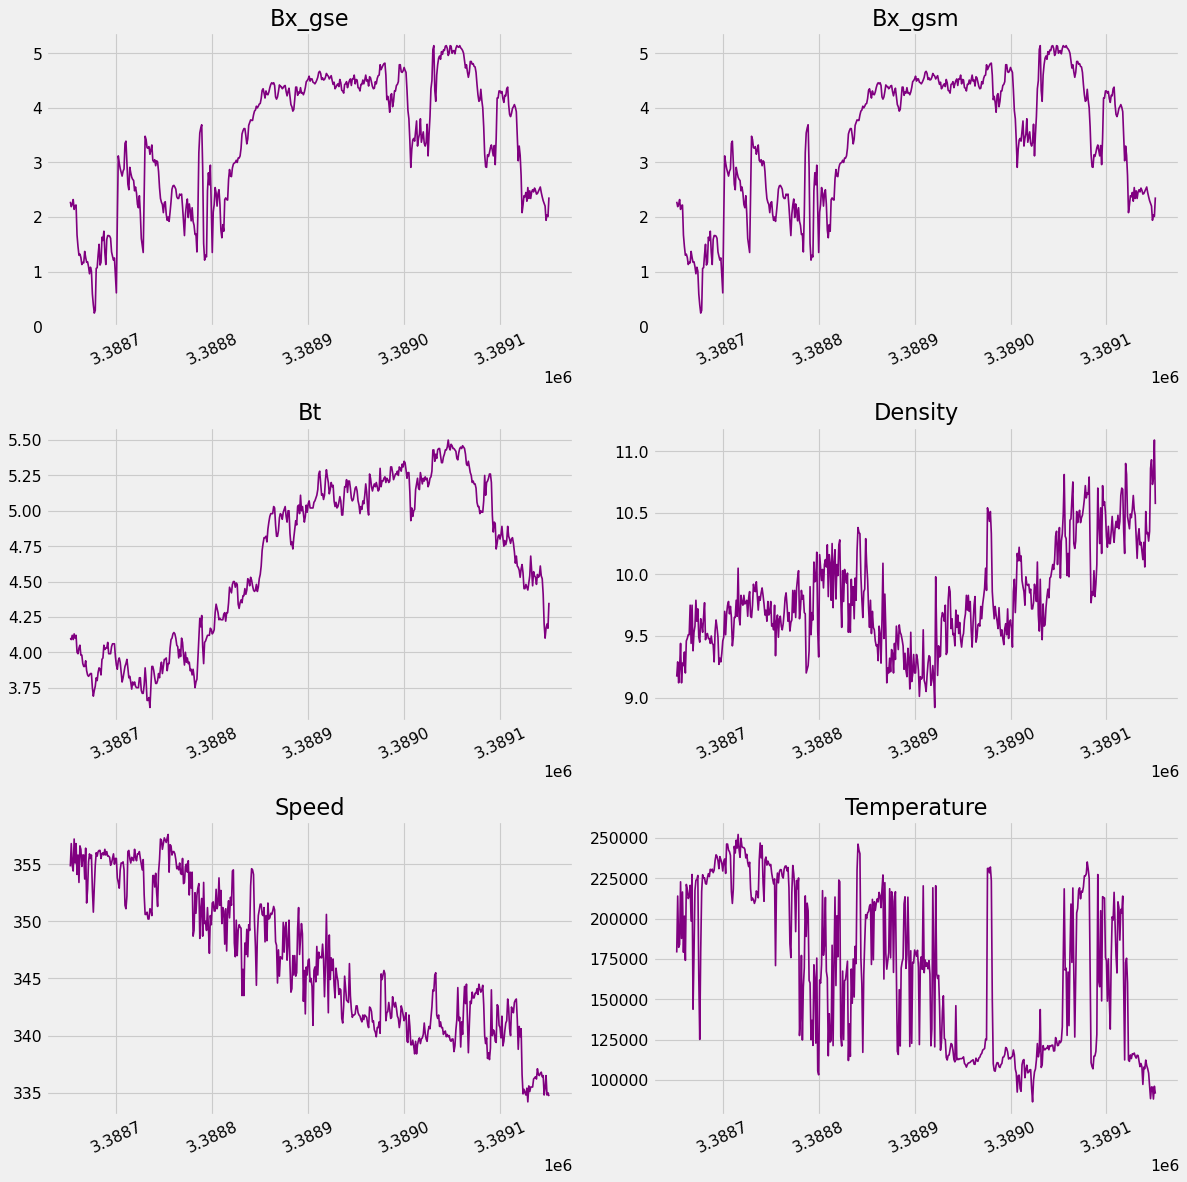

In [27]:
def visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,color='purple', lw=1.5
        )

    fig.subplots_adjust(hspace=1)
    plt.tight_layout()


columns = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
visualization(solar_wind[columns].iloc[:500])

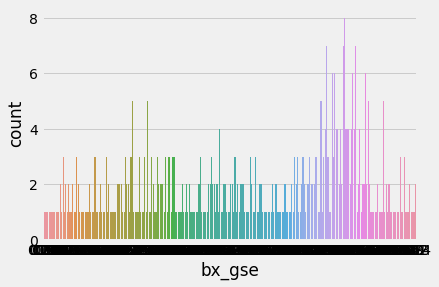

4.44    8
4.53    7
4.31    7
4.43    7
4.51    6
       ..
1.69    1
3.54    1
3.63    1
3.69    1
2.36    1
Name: bx_gse, Length: 271, dtype: int64


In [30]:
#Frequency of Speed w.r.t bx_gse
sns.countplot(x=solar_wind['bx_gse'].iloc[:500], data=solar_wind)
plt.show()
print(solar_wind['bx_gse'].iloc[:500].value_counts())

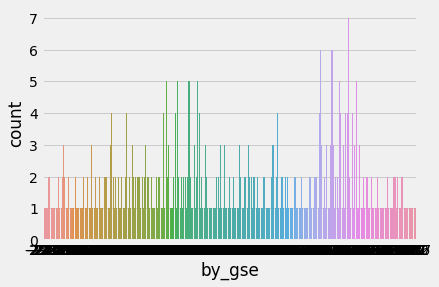

 2.37    7
 2.22    6
 2.09    6
 0.03    5
-0.33    5
        ..
 2.31    1
-1.84    1
-1.83    1
 2.18    1
 1.05    1
Name: by_gse, Length: 297, dtype: int64


In [32]:
#Frequency of Speed w.r.t by_gse
sns.countplot(x=solar_wind['by_gse'].iloc[:500], data=solar_wind)
plt.show()
print(solar_wind['by_gse'].iloc[:500].value_counts())

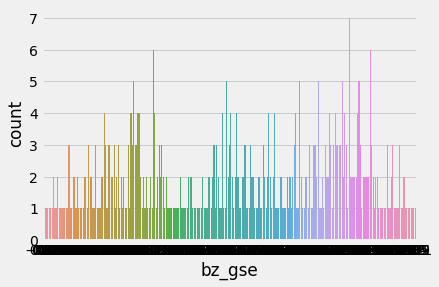

 3.34    7
 3.51    6
 1.21    6
 3.07    5
 2.91    5
        ..
 0.41    1
 0.54    1
 0.27    1
-0.05    1
 3.63    1
Name: bz_gse, Length: 267, dtype: int64


In [33]:
#Frequency of Speed w.r.t bx_gsz
sns.countplot(x=solar_wind['bz_gse'].iloc[:500], data=solar_wind)
plt.show()
print(solar_wind['bz_gse'].iloc[:500].value_counts())

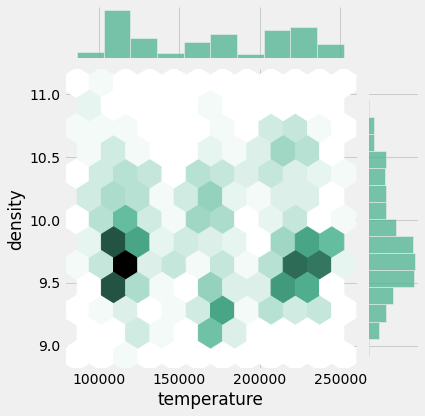

In [37]:
#Frequency of Speed w.r.t density and temperature
x = solar_wind['temperature'].iloc[:500]
y = solar_wind['density'].iloc[:500]
sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

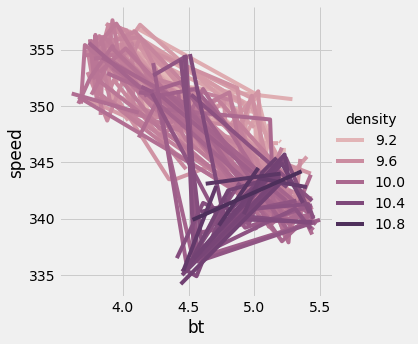

In [43]:
#Frequency of density w.r.t bt and speed
x = solar_wind['bt'].iloc[:500]
y = solar_wind['speed'].iloc[:500]
sns.relplot(x=x,y=y,hue='density',data=solar_wind.iloc[:500],kind='line') 

<h5>We can notice from the plot about that when bt and density are low the speed is high</h5>

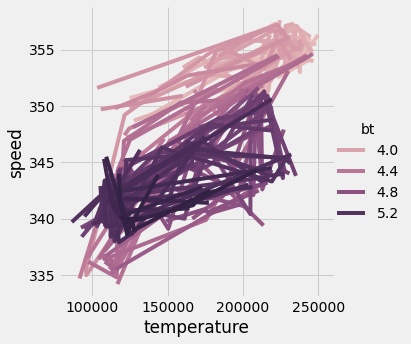

In [45]:
#Frequency of temperature w.r.t density and speed
x = solar_wind['temperature'].iloc[:500]
y = solar_wind['speed'].iloc[:500]
sns.relplot(x=x,y=y,hue='bt',data=solar_wind.iloc[:500],kind='line') 

<h5>We can notice from the plot about that when bt and temperature are low the speed is high</h5>

# Training the Model by Using Machine Learning Algorithms

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm

import sklearn.metrics as skmetric
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
import scikitplot.metrics as splt
from sklearn import preprocessing
import sklearn.metrics as metrics

# Train Test Split


In [14]:
#splitting the data for training and testing 
solar_wind = solar_wind.replace({'period': {'train_a': 0, 'train_b': 1,'train_c': 2}})
label_encoder = preprocessing.LabelEncoder()
Y=solar_wind["speed"]
X=solar_wind.drop(["speed","timedelta",'source'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Y_train = label_encoder.fit_transform(Y_train)
# Y_test = label_encoder.fit_transform(Y_test)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1149291, 14)
(287323, 14)
(1149291,)
(287323,)


# Linear Regression

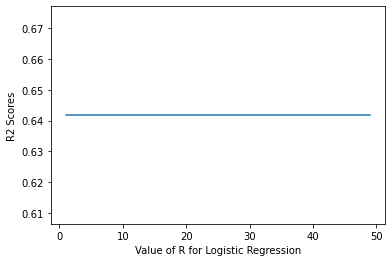

[0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371, 0.6417851096726371]


In [15]:
v_range=list(range(1,50))
scores=[]

for v in v_range:
    lr = LinearRegression()
    lr.fit(X_train,Y_train)
    lr_y_pred=lr.predict(X_test)
    scores.append(metrics.r2_score(Y_test,lr_y_pred))
plt.plot(v_range,scores)
plt.xlabel('Value of R for Logistic Regression')
plt.ylabel('R2 Scores')
plt.show()
print(scores)

<h5>As we can we from the above given graph and output that after applying the Linear Regression we are getting r2_score of 64.17851096726371</h5>

# Ridge Regression

D:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.53988e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.07976e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.61964e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
D:\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.01595e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


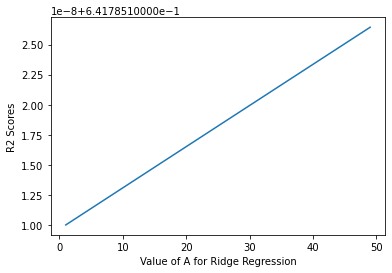

[0.6417851100151504, 0.6417851103576457, 0.6417851107001233, 0.641785111042583, 0.6417851113850249, 0.6417851117274491, 0.6417851120698553, 0.6417851124122439, 0.6417851127546144, 0.6417851130969673, 0.6417851134393022, 0.6417851137816193, 0.6417851141239186, 0.6417851144662003, 0.6417851148084638, 0.6417851151507097, 0.6417851154929377, 0.641785115835148, 0.6417851161773402, 0.641785116519515, 0.6417851168616716, 0.6417851172038106, 0.6417851175459317, 0.641785117888035, 0.6417851182301204, 0.6417851185721883, 0.6417851189142381, 0.6417851192562701, 0.6417851195982843, 0.6417851199402809, 0.6417851202822595, 0.6417851206242203, 0.6417851209661634, 0.6417851213080885, 0.6417851216499959, 0.6417851219918854, 0.6417851223337572, 0.6417851226756113, 0.6417851230174472, 0.6417851233592655, 0.6417851237010661, 0.6417851240428489, 0.641785124384614, 0.6417851247263611, 0.6417851250680904, 0.6417851254098018, 0.6417851257514956, 0.6417851260931715, 0.6417851264348295]


In [16]:
a_range=list(range(1,50))
scores=[]

for a in a_range:
    r = Ridge(alpha=a)
    r.fit(X_train,Y_train)
    r_y_pred=r.predict(X_test)
    scores.append(metrics.r2_score(Y_test,r_y_pred))
plt.plot(a_range,scores)
plt.xlabel('Value of A for Ridge Regression')
plt.ylabel('R2 Scores')
plt.show()
print(scores)

<h5>As we can we from the above given graph and output that after applying the Ridge Regression, we are getting maximum score on value of alpha = 50 we are getting r2_score of 64.17851264348295</h5>

# Lasso Regression

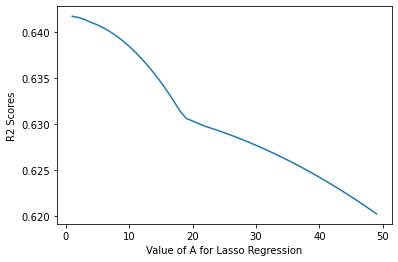

[0.6416761212344289, 0.6415422218358435, 0.6413036092798049, 0.6410058064462846, 0.6407319566405651, 0.6403946870483057, 0.6399936667151491, 0.6395293775218482, 0.6390013072819614, 0.6384093292571064, 0.637754055726006, 0.6370358082692105, 0.6362597211467527, 0.6354181590212107, 0.6345096524542198, 0.6335380973683699, 0.6325023565697536, 0.6314027026486857, 0.6305925374213192, 0.6303133286878257, 0.6300194651581541, 0.6297405575172396, 0.6295176488485337, 0.6292848608218835, 0.6290421668557673, 0.6287895275465498, 0.6285270258834789, 0.6282545932683072, 0.627972236631308, 0.6276799535262175, 0.6273776630573019, 0.6270655303967219, 0.6267434734729516, 0.6264114941953427, 0.6260695925638948, 0.6257177678657428, 0.6253560175473919, 0.6249843451281956, 0.6246027506640193, 0.6242112337252107, 0.6238097943117704, 0.6233984324236981, 0.6229771480609936, 0.6225459412236573, 0.6221048116846069, 0.6216539015702027, 0.621192930275813, 0.6207220365270503, 0.6202413352197533]


In [17]:
a_range=list(range(1,50))
scores=[]

for a in a_range:
    l = Lasso(alpha=a)
    l.fit(X_train,Y_train)
    l_y_pred=l.predict(X_test)
    scores.append(metrics.r2_score(Y_test,l_y_pred))
plt.plot(a_range,scores)
plt.xlabel('Value of A for Lasso Regression')
plt.ylabel('R2 Scores')
plt.show()
print(scores)

<h5>As we can we from the above given graph and output that after applying the Lasso Regression and giving value of alpha=1 we are getting r2_score of 64.16761212344289 </h5>

# Comparing the Models

In [21]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('R',Ridge(alpha=49)))
models.append(('L',Lasso(alpha=1)))
models

[('LR', LinearRegression()), ('R', Ridge(alpha=49)), ('L', Lasso(alpha=1))]

In [22]:
names=[]
results=[]

for name,model in models:
    obj=model
    names.append(name)
    obj.fit(X_train,Y_train)
    y_pred = obj.predict(X_test)
    results.append(metrics.r2_score(Y_test,y_pred)*100)
    
print(results)

[64.17851096726372, 64.17851264348296, 64.16761212344288]


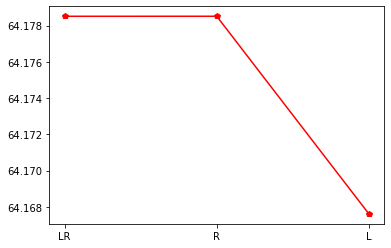

In [23]:
plt.plot(names,results,'-p',color='red')
plt.show()

<h5>As we can see that we are using the most accurate results on Linear Regression rather than on Lasso and Ridge</h5>

# Conclusion:

<h4>As we got the data of solar winds we first got to remove all the null values from the data and also take the data that comes from sourc disocvr after, after all the preprocessing we did some visualization we got us to the results that, when bt and density are low the speed is high and  when bt and temperature are low the speed is high. which means that low temperature,density and bt often lead us to the peak in speed of solar wind that lead to geomagnetic storms like carrington event and also w proved our point by training our model via using diffierent model among which Linear Regression algorithm was giving the optimal results.<h4>